In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [3]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.e+-]+)",

        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.e+-]+)",

        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.e+-]+)",

        "Painter_Knapsack_combined_efficiency": r"Painter\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_Painter_Knapsack_Combined_time": r"Final painter\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "Hilbert_SFC_efficiency": r"Hilbert SFC efficiency:\s+([\d.]+)",
        "Final_Hilbert_SFC_time": r"Final Hilbert SFC time:\s+([\d.e+-]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

# file_paths = ['../output/run_250/4_4_output_worst.txt', '../output/run_250/4_8_output_worst.txt', '../output/run_250/4_16_output_worst.txt',
#               '../output/run_250/8_4_output_worst.txt', '../output/run_250/8_8_output_worst.txt', '../output/run_250/8_16_output_worst.txt',
#               '../output/run_250/16_4_output_worst.txt', '../output/run_250/16_8_output_worst.txt', '../output/run_250/16_16_output_worst.txt',
#               '../output/run_250/32_4_output_worst.txt', '../output/run_250/32_8_output_worst.txt', '../output/run_250/32_16_output_worst.txt',
#               '../output/run_250/64_4_output_worst.txt', '../output/run_250/64_8_output_worst.txt', '../output/run_250/64_16_output_worst.txt',
#               '../output/run_250/128_4_output_worst.txt', '../output/run_250/128_8_output_worst.txt', '../output/run_250/128_16_output_worst.txt',
#               '../output/run_250/256_4_output_worst.txt', '../output/run_250/256_8_output_worst.txt', '../output/run_250/256_16_output_worst.txt',
#               '../output/run_250/512_4_output_worst.txt','../output/run_250/512_8_output_worst.txt','../output/run_250/512_16_output_worst.txt']
#             #   '../output/run_250/1024_4_output_worst.txt','../output/run_250/1024_8_output_worst.txt','../output/run_250/1024_16_output_worst.txt']

file_paths = ['../output/run_250/1024_4_output_worst.txt','../output/run_250/1024_8_output_worst.txt','../output/run_250/1024_16_output_worst.txt']



result_df = consolidate_data_from_files(file_paths)




In [4]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,Painter_Knapsack_combined_efficiency,Final_Painter_Knapsack_Combined_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,Hilbert_SFC_efficiency,Final_Hilbert_SFC_time,File
0,1,0.971028,0.280348,0.763429,0.142186,0.884413,0.004994,0.881697,0.077223,0.856212,0.069406,0.928546,0.035394,../output/run_250/1024_4_output_worst.txt
1,2,0.971703,0.283657,0.764596,0.139978,0.883880,0.004718,0.878416,0.074687,0.855614,0.073942,0.942172,0.037584,../output/run_250/1024_4_output_worst.txt
2,3,0.972915,0.277822,0.785225,0.137506,0.881926,0.004728,0.879583,0.072294,0.863490,0.068340,0.944458,0.034392,../output/run_250/1024_4_output_worst.txt
3,4,0.973904,0.276655,0.767180,0.139437,0.883053,0.005067,0.879322,0.072938,0.849174,0.068232,0.933993,0.034099,../output/run_250/1024_4_output_worst.txt
4,5,0.971961,0.280647,0.770230,0.136162,0.883821,0.005107,0.874430,0.073558,0.855393,0.068888,0.930589,0.035722,../output/run_250/1024_4_output_worst.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,246,0.995614,0.270827,0.930538,0.134686,0.967923,0.698547,0.967949,0.748061,0.962693,0.074258,0.978398,0.038112,../output/run_250/1024_16_output_worst.txt
746,247,0.995109,0.262101,0.929587,0.133248,0.967381,0.687208,0.972713,0.727852,0.959770,0.071149,0.978256,0.038450,../output/run_250/1024_16_output_worst.txt
747,248,0.995420,0.263358,0.928334,0.136535,0.968227,0.697559,0.968801,0.749279,0.965402,0.071844,0.983973,0.036714,../output/run_250/1024_16_output_worst.txt
748,249,0.995436,0.259455,0.926098,0.131521,0.968069,0.687228,0.970488,0.727591,0.958386,0.073225,0.984328,0.037538,../output/run_250/1024_16_output_worst.txt


In [5]:
result_df.head(10)

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,Painter_Knapsack_combined_efficiency,Final_Painter_Knapsack_Combined_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,Hilbert_SFC_efficiency,Final_Hilbert_SFC_time,File
0,1,0.971028,0.280348,0.763429,0.142186,0.884413,0.004994,0.881697,0.077223,0.856212,0.069406,0.928546,0.035394,../output/run_250/1024_4_output_worst.txt
1,2,0.971703,0.283657,0.764596,0.139978,0.883880,0.004718,0.878416,0.074687,0.855614,0.073942,0.942172,0.037584,../output/run_250/1024_4_output_worst.txt
2,3,0.972915,0.277822,0.785225,0.137506,0.881926,0.004728,0.879583,0.072294,0.863490,0.068340,0.944458,0.034392,../output/run_250/1024_4_output_worst.txt
3,4,0.973904,0.276655,0.767180,0.139437,0.883053,0.005067,0.879322,0.072938,0.849174,0.068232,0.933993,0.034099,../output/run_250/1024_4_output_worst.txt
4,5,0.971961,0.280647,0.770230,0.136162,0.883821,0.005107,0.874430,0.073558,0.855393,0.068888,0.930589,0.035722,../output/run_250/1024_4_output_worst.txt
5,6,0.972109,0.279958,0.777916,0.138169,0.885074,0.004750,0.879409,0.074196,0.844541,0.070889,0.944162,0.037207,../output/run_250/1024_4_output_worst.txt
6,7,0.970856,0.270514,0.784274,0.137829,0.884339,0.005060,0.878206,0.072590,0.858685,0.066077,0.924278,0.035810,../output/run_250/1024_4_output_worst.txt
7,8,0.972201,0.274925,0.758284,0.132742,0.887544,0.005089,0.881386,0.074446,0.864248,0.068772,0.935555,0.035007,../output/run_250/1024_4_output_worst.txt
8,9,0.973198,0.266895,0.765060,0.137990,0.880725,0.056255,0.880476,0.074920,0.871542,0.073594,0.927873,0.035827,../output/run_250/1024_4_output_worst.txt
9,10,0.971264,0.264913,0.785825,0.140460,0.884898,0.005106,0.886523,0.074176,0.858851,0.070688,0.933680,0.039822,../output/run_250/1024_4_output_worst.txt


In [6]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [7]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [8]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,Painter_Knapsack_combined_efficiency,Final_Painter_Knapsack_Combined_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,Hilbert_SFC_efficiency,Final_Hilbert_SFC_time,File
0,1,0.971028,0.280348,0.763429,0.142186,0.884413,0.004994,0.881697,0.077223,0.856212,0.069406,0.928546,0.035394,1024_4_Output_Worst
1,2,0.971703,0.283657,0.764596,0.139978,0.883880,0.004718,0.878416,0.074687,0.855614,0.073942,0.942172,0.037584,1024_4_Output_Worst
2,3,0.972915,0.277822,0.785225,0.137506,0.881926,0.004728,0.879583,0.072294,0.863490,0.068340,0.944458,0.034392,1024_4_Output_Worst
3,4,0.973904,0.276655,0.767180,0.139437,0.883053,0.005067,0.879322,0.072938,0.849174,0.068232,0.933993,0.034099,1024_4_Output_Worst
4,5,0.971961,0.280647,0.770230,0.136162,0.883821,0.005107,0.874430,0.073558,0.855393,0.068888,0.930589,0.035722,1024_4_Output_Worst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,246,0.995614,0.270827,0.930538,0.134686,0.967923,0.698547,0.967949,0.748061,0.962693,0.074258,0.978398,0.038112,1024_16_Output_Worst
746,247,0.995109,0.262101,0.929587,0.133248,0.967381,0.687208,0.972713,0.727852,0.959770,0.071149,0.978256,0.038450,1024_16_Output_Worst
747,248,0.995420,0.263358,0.928334,0.136535,0.968227,0.697559,0.968801,0.749279,0.965402,0.071844,0.983973,0.036714,1024_16_Output_Worst
748,249,0.995436,0.259455,0.926098,0.131521,0.968069,0.687228,0.970488,0.727591,0.958386,0.073225,0.984328,0.037538,1024_16_Output_Worst


In [9]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','Painter_Knapsack_combined_efficiency':'Painter_Knapsack_Combined_Efficiency','Final_Painter_Knapsack_Combined_time':'Painter_Knapsack_Combined_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time', 'Hilbert_SFC_efficiency':'Hilbert_SFC_Efficiency', 'Final_Hilbert_SFC_time':'Hilbert_SFC_Final_Time'} )

In [10]:
result_df

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,Painter_Knapsack_Combined_Efficiency,Painter_Knapsack_Combined_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,Hilbert_SFC_Efficiency,Hilbert_SFC_Final_Time,File
0,1,0.971028,0.280348,0.763429,0.142186,0.884413,0.004994,0.881697,0.077223,0.856212,0.069406,0.928546,0.035394,1024_4_Output_Worst
1,2,0.971703,0.283657,0.764596,0.139978,0.883880,0.004718,0.878416,0.074687,0.855614,0.073942,0.942172,0.037584,1024_4_Output_Worst
2,3,0.972915,0.277822,0.785225,0.137506,0.881926,0.004728,0.879583,0.072294,0.863490,0.068340,0.944458,0.034392,1024_4_Output_Worst
3,4,0.973904,0.276655,0.767180,0.139437,0.883053,0.005067,0.879322,0.072938,0.849174,0.068232,0.933993,0.034099,1024_4_Output_Worst
4,5,0.971961,0.280647,0.770230,0.136162,0.883821,0.005107,0.874430,0.073558,0.855393,0.068888,0.930589,0.035722,1024_4_Output_Worst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,246,0.995614,0.270827,0.930538,0.134686,0.967923,0.698547,0.967949,0.748061,0.962693,0.074258,0.978398,0.038112,1024_16_Output_Worst
746,247,0.995109,0.262101,0.929587,0.133248,0.967381,0.687208,0.972713,0.727852,0.959770,0.071149,0.978256,0.038450,1024_16_Output_Worst
747,248,0.995420,0.263358,0.928334,0.136535,0.968227,0.697559,0.968801,0.749279,0.965402,0.071844,0.983973,0.036714,1024_16_Output_Worst
748,249,0.995436,0.259455,0.926098,0.131521,0.968069,0.687228,0.970488,0.727591,0.958386,0.073225,0.984328,0.037538,1024_16_Output_Worst


In [11]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [12]:
print(column_list)

[0.8562116025, 0.8556142255, 0.8634900948, 0.8491743446, 0.8553926268, 0.8445411704, 0.8586854555, 0.8642484205, 0.8715417444, 0.8588505035, 0.8661422807, 0.8597304598, 0.8629029215, 0.8654082504, 0.8588514333, 0.8567725579, 0.8660842852, 0.8520068468, 0.8602601219, 0.8653150058, 0.8733924601, 0.8572461706, 0.8528525409, 0.8755137787, 0.8610760141, 0.8628340502, 0.8506931015, 0.8702209145, 0.8612761639, 0.8668543571, 0.8552999625, 0.8586293035, 0.8593776068, 0.8672695739, 0.8746582232, 0.8550990759, 0.8412079727, 0.8705815694, 0.8580103708, 0.8712398994, 0.8518942936, 0.864416444, 0.8680040039, 0.8749444704, 0.8588006055, 0.8699706746, 0.8556155024, 0.8626993937, 0.8675309151, 0.8667996987, 0.8550976973, 0.8549692194, 0.8658857758, 0.8532662568, 0.8563255455, 0.8592459979, 0.8640819348, 0.8609588606, 0.8637297312, 0.8622562344, 0.8561287675, 0.8584648968, 0.8677914014, 0.8492309556, 0.8540044476, 0.8685182856, 0.8600366901, 0.8630223604, 0.8618484754, 0.8715689411, 0.8689902436, 0.8637

In [12]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [13]:
filename = '1024_4_Output_Worst'
df_1 = result_df[result_df['File'] == filename]

In [14]:
df_1

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,Painter_Knapsack_Combined_Efficiency,Painter_Knapsack_Combined_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,Hilbert_SFC_Efficiency,Hilbert_SFC_Final_Time,File
0,1,0.971028,0.280348,0.763429,0.142186,0.884413,0.004994,0.881697,0.077223,0.856212,0.069406,0.928546,0.035394,1024_4_Output_Worst
1,2,0.971703,0.283657,0.764596,0.139978,0.883880,0.004718,0.878416,0.074687,0.855614,0.073942,0.942172,0.037584,1024_4_Output_Worst
2,3,0.972915,0.277822,0.785225,0.137506,0.881926,0.004728,0.879583,0.072294,0.863490,0.068340,0.944458,0.034392,1024_4_Output_Worst
3,4,0.973904,0.276655,0.767180,0.139437,0.883053,0.005067,0.879322,0.072938,0.849174,0.068232,0.933993,0.034099,1024_4_Output_Worst
4,5,0.971961,0.280647,0.770230,0.136162,0.883821,0.005107,0.874430,0.073558,0.855393,0.068888,0.930589,0.035722,1024_4_Output_Worst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,0.971313,0.278392,0.779771,0.141137,0.885940,0.053491,0.881933,0.116784,0.862450,0.073109,0.939481,0.039356,1024_4_Output_Worst
246,247,0.971736,0.278313,0.754309,0.141370,0.888738,0.053230,0.878341,0.117761,0.871062,0.072687,0.937669,0.036005,1024_4_Output_Worst
247,248,0.971383,0.278793,0.770534,0.142379,0.882304,0.053208,0.879337,0.118643,0.854932,0.074689,0.928697,0.035746,1024_4_Output_Worst
248,249,0.971182,0.273866,0.753653,0.137487,0.883937,0.053194,0.881434,0.121107,0.855434,0.072020,0.944878,0.036077,1024_4_Output_Worst


In [15]:
pd.set_option('display.max_columns', None)

In [16]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [16]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_208616/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [17]:
specific_group = grouped.get_group('1024_8_Output_Worst')
specific_group

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,Painter_Knapsack_Combined_Efficiency,Painter_Knapsack_Combined_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,Hilbert_SFC_Efficiency,Hilbert_SFC_Final_Time,File
250,1,0.989533,0.253988,0.874027,0.127787,0.937367,0.184756,0.935403,0.255650,0.922380,0.065473,0.965016,0.033563,1024_8_Output_Worst
251,2,0.989452,0.254450,0.860974,0.133493,0.936505,0.015042,0.934791,0.270221,0.928076,0.068952,0.966559,0.037081,1024_8_Output_Worst
252,3,0.989025,0.280265,0.876011,0.139801,0.939335,0.196234,0.939274,0.087881,0.927391,0.073740,0.968086,0.037048,1024_8_Output_Worst
253,4,0.989446,0.255442,0.865541,0.129847,0.938080,0.190571,0.928990,0.236192,0.921824,0.072492,0.968584,0.035039,1024_8_Output_Worst
254,5,0.989402,0.252598,0.865773,0.129530,0.936460,0.196363,0.927088,0.080107,0.929966,0.066926,0.967479,0.034365,1024_8_Output_Worst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,246,0.989953,0.265429,0.873853,0.133103,0.935927,0.196152,0.928869,0.083895,0.918349,0.068807,0.970990,0.036160,1024_8_Output_Worst
496,247,0.989401,0.296469,0.866604,0.150808,0.936331,0.195962,0.926340,0.101242,0.928027,0.071022,0.969616,0.038098,1024_8_Output_Worst
497,248,0.988737,0.318158,0.878527,0.144222,0.937700,0.197903,0.942356,0.268569,0.931006,0.090791,0.959523,0.035591,1024_8_Output_Worst
498,249,0.989048,0.274974,0.860974,0.137304,0.937198,0.195955,0.931533,0.084856,0.936400,0.071150,0.971221,0.038196,1024_8_Output_Worst


In [18]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9890469400656)

In [19]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Painter_Knapsack_Combined_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency',
    'Hilbert_SFC_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Painter_Knapsack_Combined_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time',
    'Hilbert_SFC_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_208616/2252273299.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [20]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024_4_Output_Worst,0.971723,0.001321,0.967635,0.975398,0.883263,0.002035,0.877885,0.888738,0.878467,0.003687,0.871528,0.889836,0.769548,0.013640,0.716235,0.797021,0.861408,0.008242,0.837811,0.883597,0.935723,0.006921,0.899499,0.949990,0.682703,0.979532,0.264913,5.676039,0.029217,0.025460,0.004249,0.061391,0.201337,0.271239,0.071172,1.433558,0.351766,0.523436,0.132742,2.777488,0.183785,0.285965,0.066077,1.642102,0.090979,0.147865,0.033991,0.805930
1,1024_8_Output_Worst,0.989047,0.000580,0.987584,0.990815,0.937671,0.001161,0.934101,0.940345,0.932569,0.004270,0.919653,0.942356,0.870895,0.008672,0.832767,0.893334,0.925652,0.005185,0.913476,0.937970,0.967395,0.003287,0.957785,0.975219,0.271931,0.027345,0.248055,0.482967,0.186058,0.040151,0.014548,0.207765,0.225481,0.053982,0.078875,0.327600,0.135923,0.018611,0.123337,0.318434,0.073207,0.017339,0.063994,0.228223,0.036373,0.004180,0.033342,0.085437
2,1024_16_Output_Worst,0.995328,0.000273,0.994303,0.996084,0.967784,0.000596,0.965929,0.969658,0.968225,0.002032,0.961853,0.972713,0.930347,0.004407,0.914176,0.940447,0.964471,0.002752,0.954454,0.970348,0.983255,0.001723,0.976787,0.986961,0.265820,0.008770,0.250842,0.313190,0.693189,0.005445,0.686263,0.708841,0.729714,0.088636,0.112231,0.863797,0.134139,0.005417,0.124020,0.166864,0.072758,0.002941,0.066973,0.091004,0.038717,0.004176,0.035296,0.101004


In [21]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Worst', r'\1R_\2BPR', regex=True)

In [22]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024R_4BPR,0.971723,0.001321,0.967635,0.975398,0.883263,0.002035,0.877885,0.888738,0.878467,0.003687,0.871528,0.889836,0.769548,0.013640,0.716235,0.797021,0.861408,0.008242,0.837811,0.883597,0.935723,0.006921,0.899499,0.949990,0.682703,0.979532,0.264913,5.676039,0.029217,0.025460,0.004249,0.061391,0.201337,0.271239,0.071172,1.433558,0.351766,0.523436,0.132742,2.777488,0.183785,0.285965,0.066077,1.642102,0.090979,0.147865,0.033991,0.805930
1,1024R_8BPR,0.989047,0.000580,0.987584,0.990815,0.937671,0.001161,0.934101,0.940345,0.932569,0.004270,0.919653,0.942356,0.870895,0.008672,0.832767,0.893334,0.925652,0.005185,0.913476,0.937970,0.967395,0.003287,0.957785,0.975219,0.271931,0.027345,0.248055,0.482967,0.186058,0.040151,0.014548,0.207765,0.225481,0.053982,0.078875,0.327600,0.135923,0.018611,0.123337,0.318434,0.073207,0.017339,0.063994,0.228223,0.036373,0.004180,0.033342,0.085437
2,1024R_16BPR,0.995328,0.000273,0.994303,0.996084,0.967784,0.000596,0.965929,0.969658,0.968225,0.002032,0.961853,0.972713,0.930347,0.004407,0.914176,0.940447,0.964471,0.002752,0.954454,0.970348,0.983255,0.001723,0.976787,0.986961,0.265820,0.008770,0.250842,0.313190,0.693189,0.005445,0.686263,0.708841,0.729714,0.088636,0.112231,0.863797,0.134139,0.005417,0.124020,0.166864,0.072758,0.002941,0.066973,0.091004,0.038717,0.004176,0.035296,0.101004


In [24]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


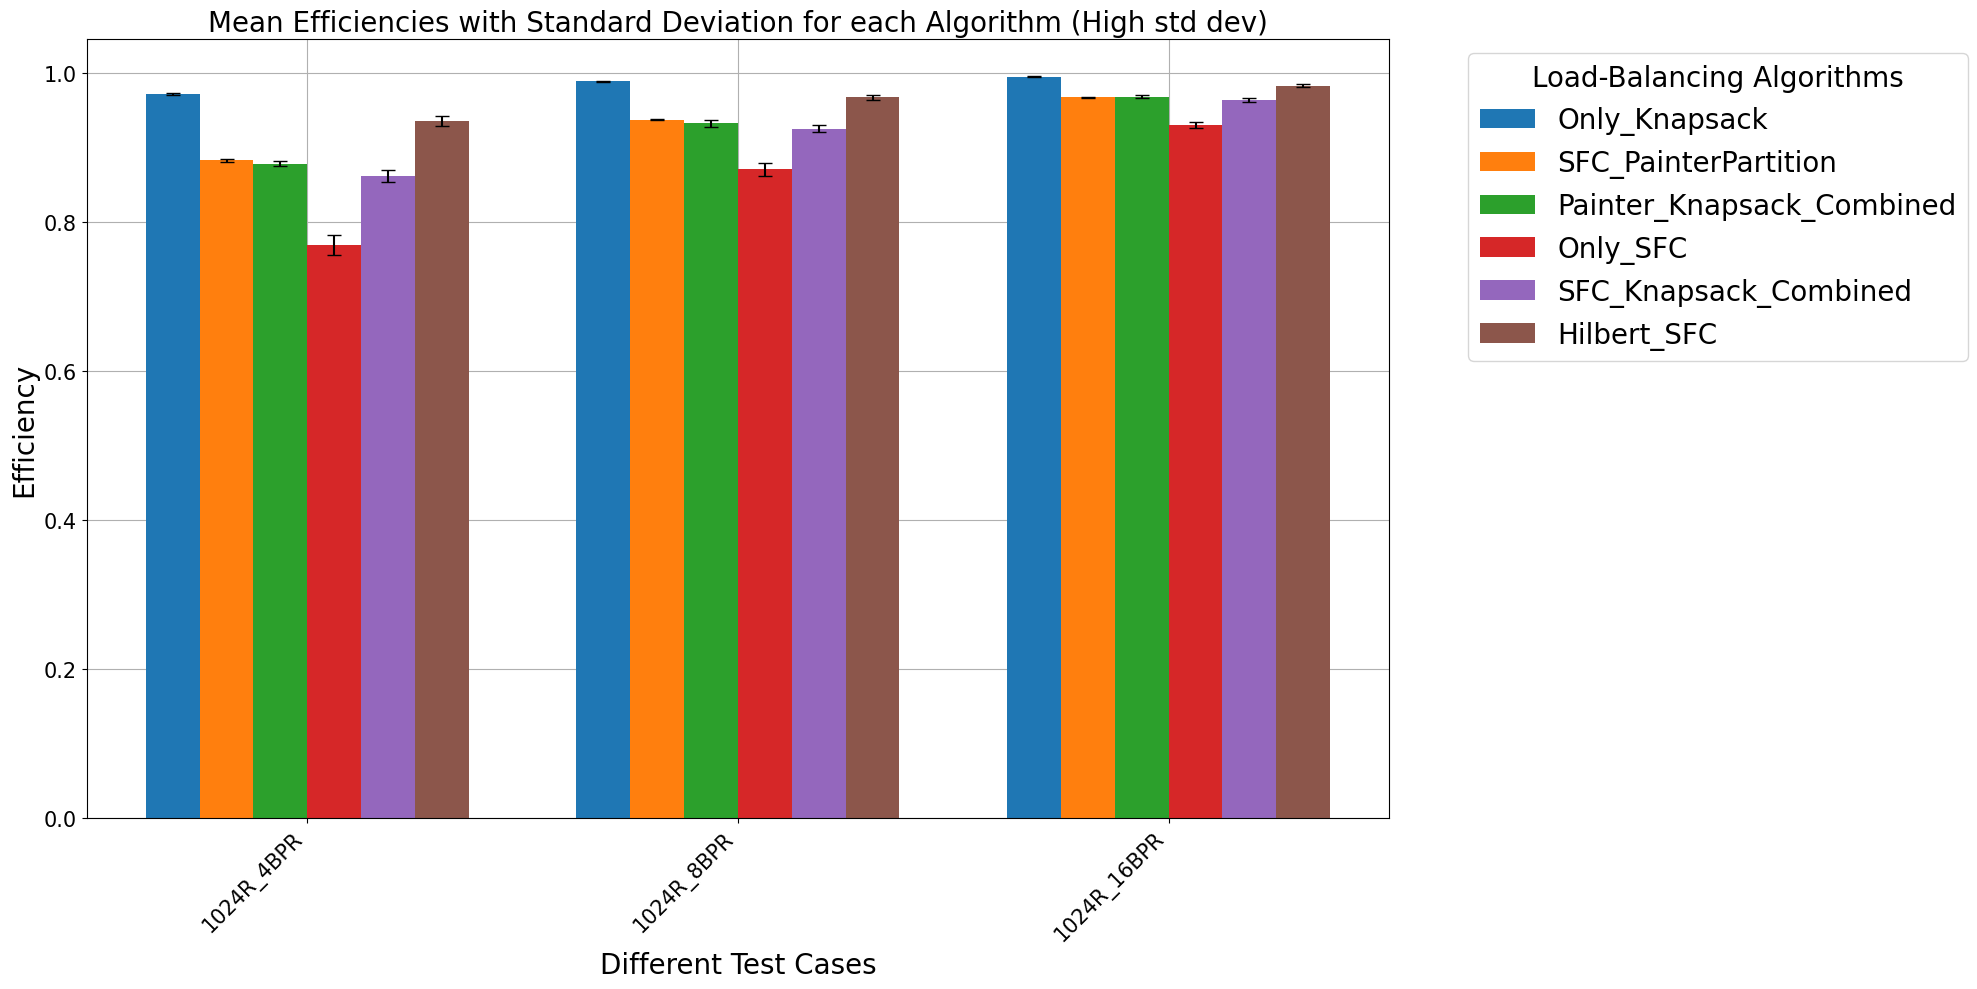

In [23]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standard Deviation for each Algorithm (High std dev)', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

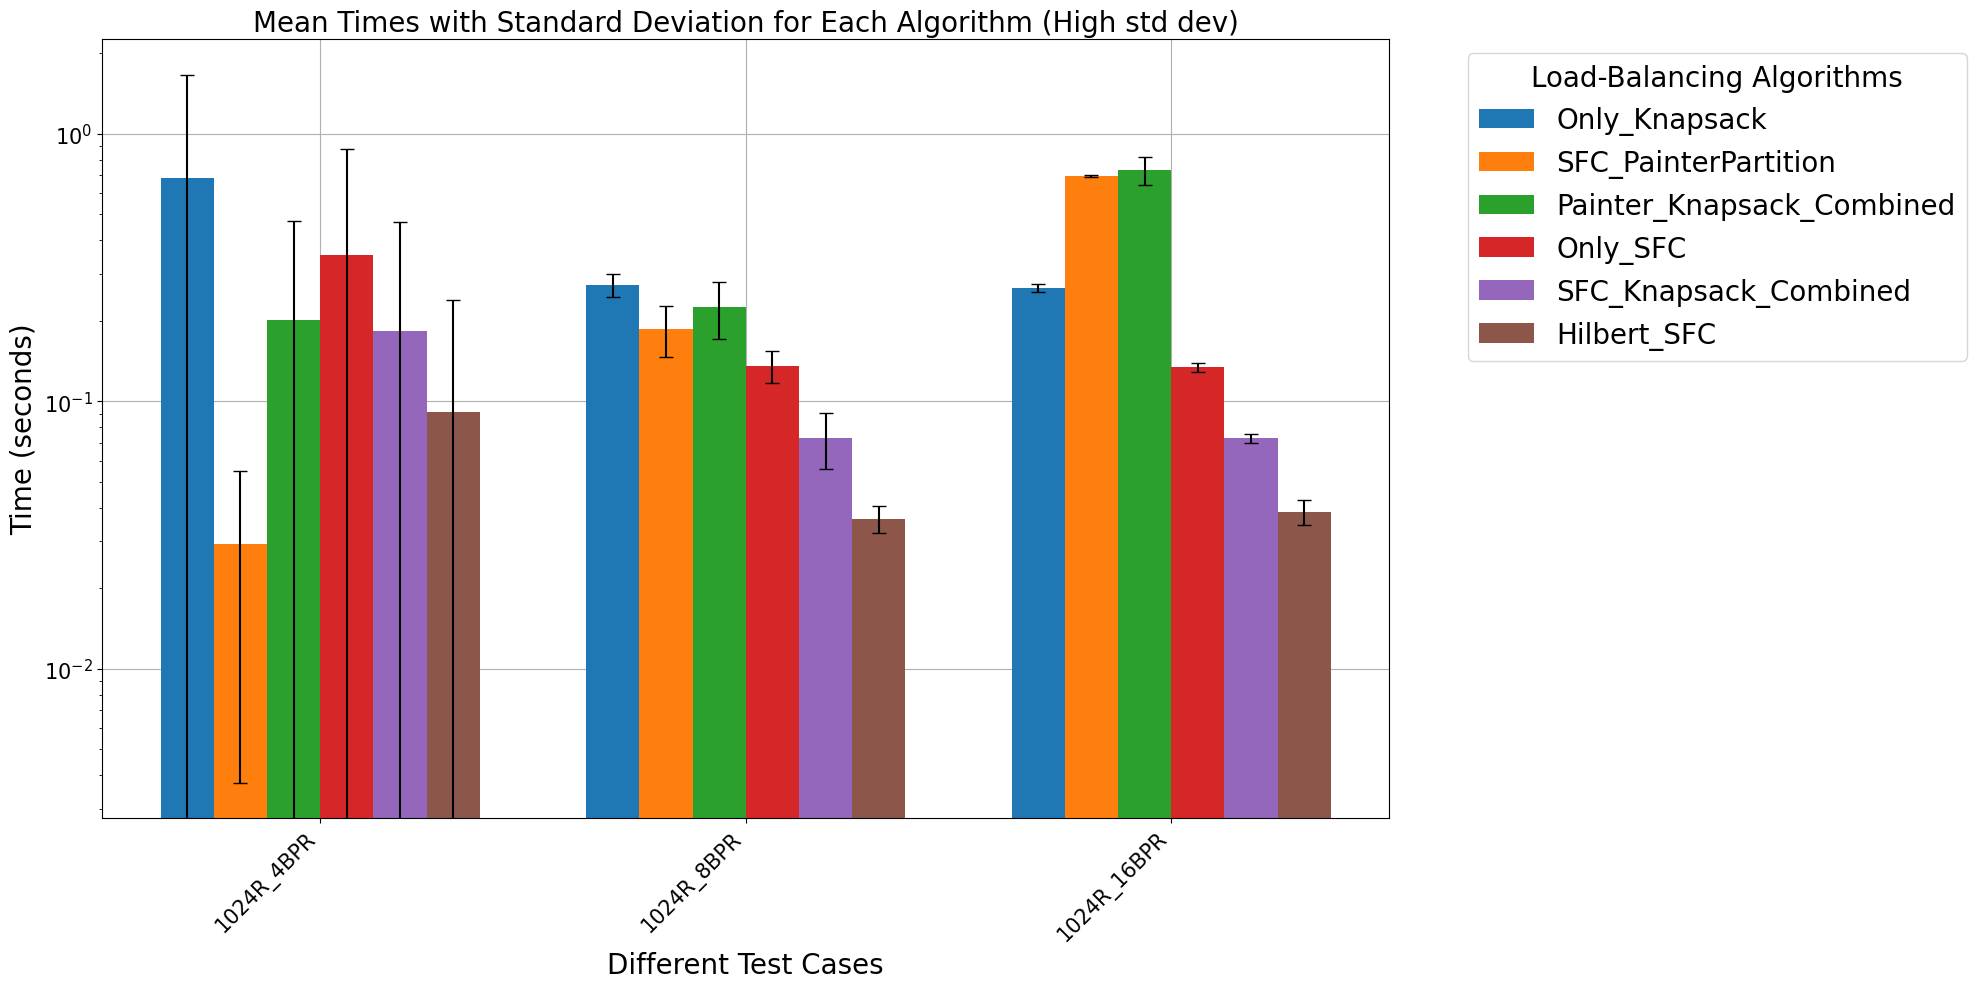

In [24]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm (High std dev)', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/time_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']

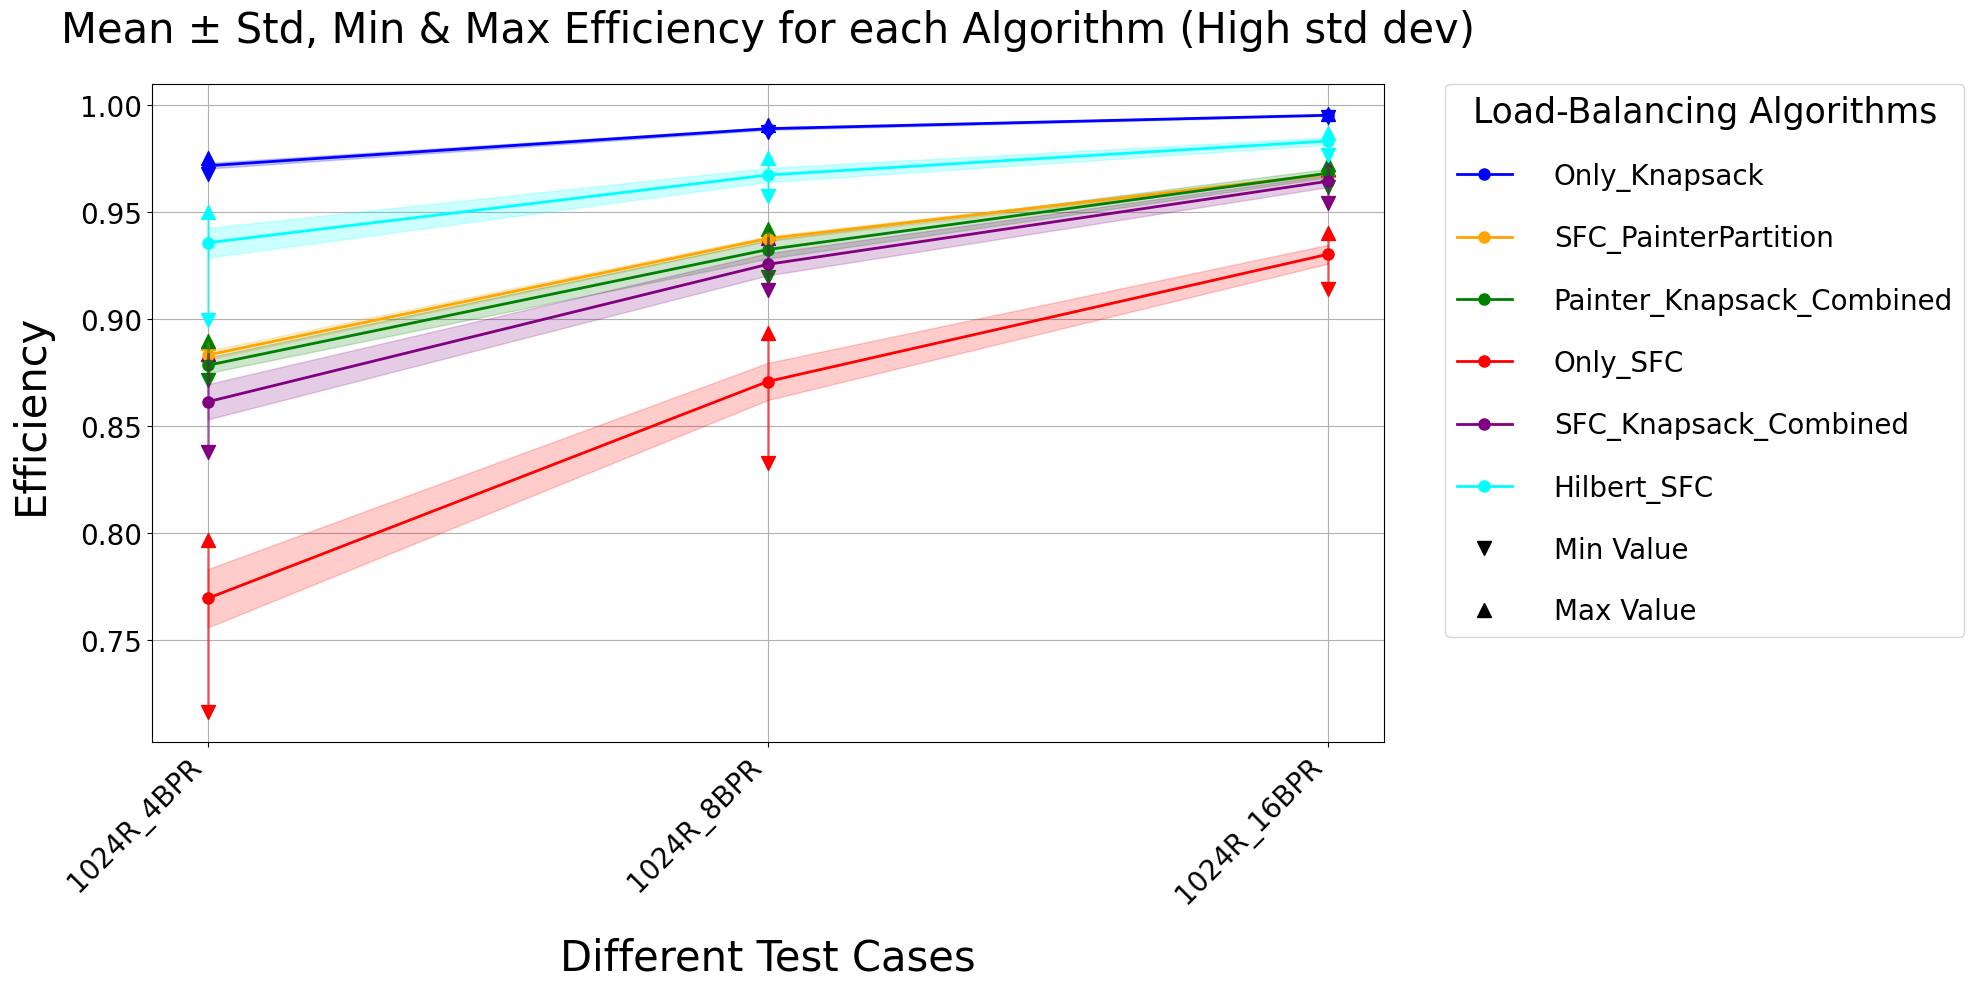

In [25]:

algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm (High std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_all_stats.png', dpi=600)
plt.show()





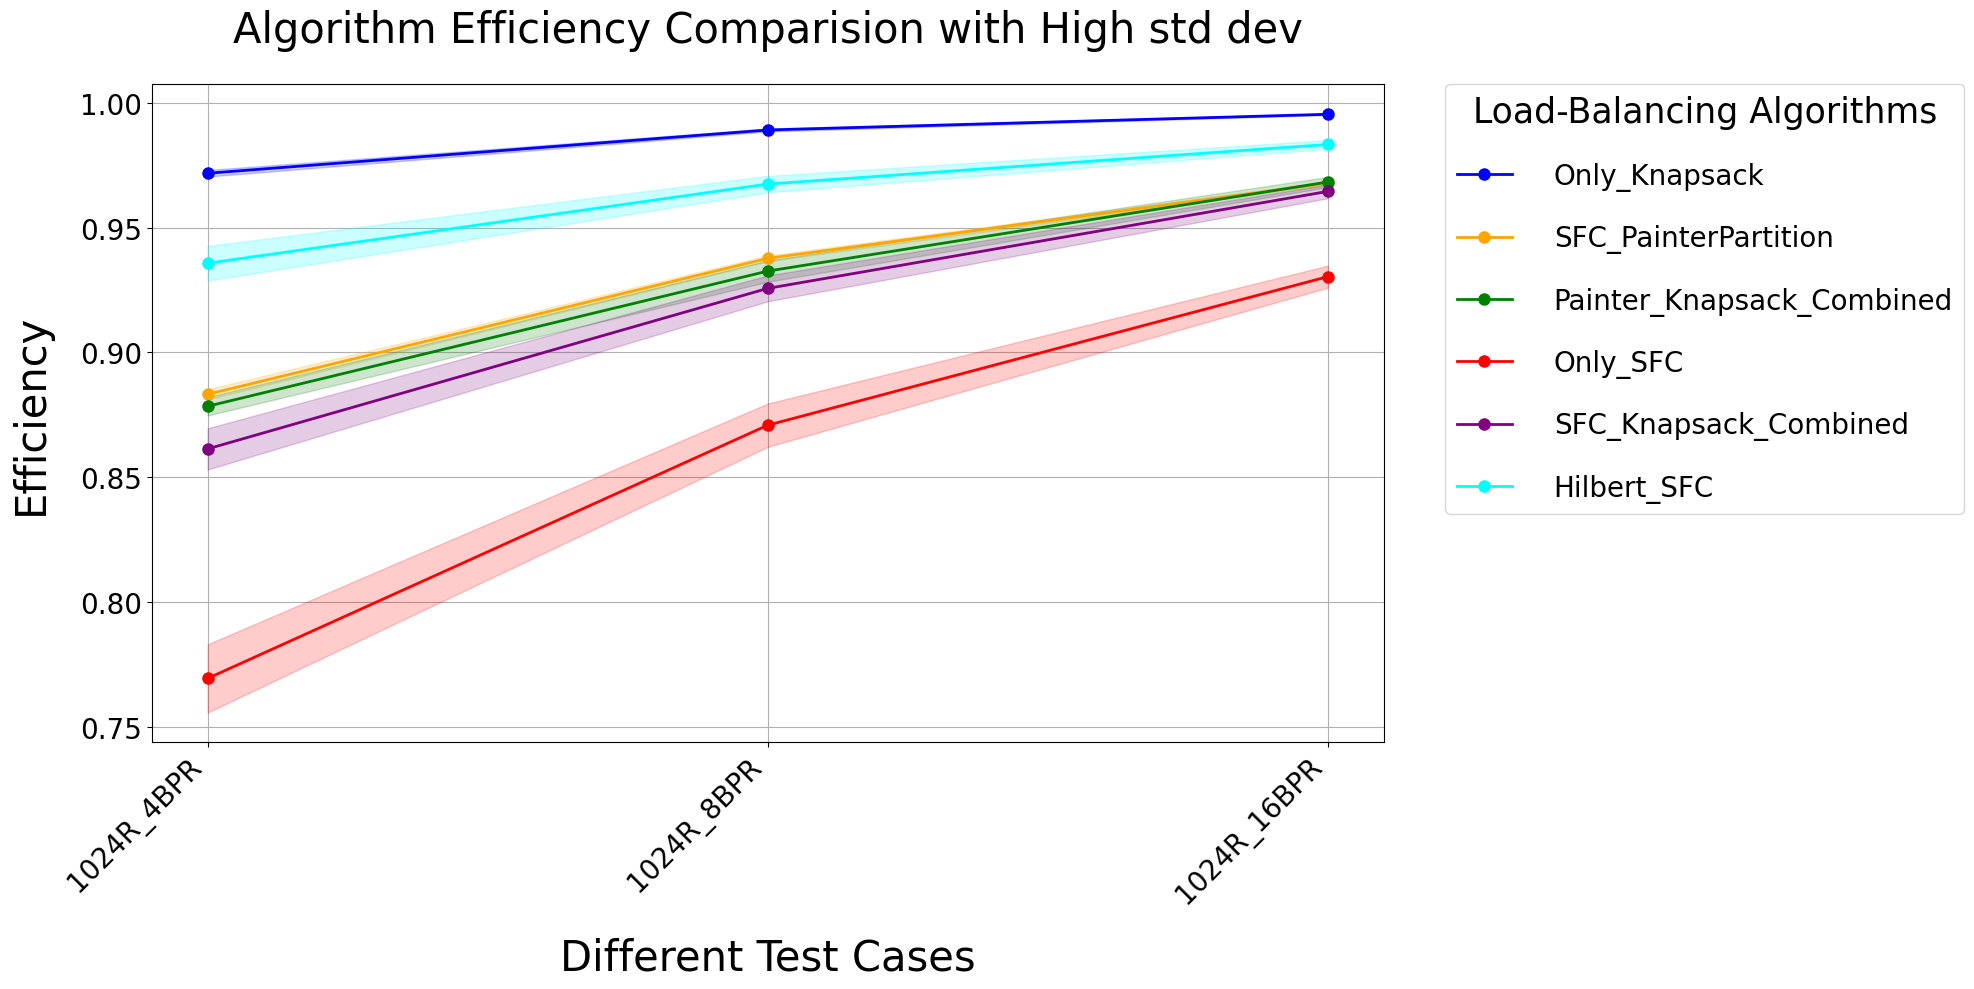

In [27]:
algorithms = [
    'Only_Knapsack', 
    'SFC_PainterPartition', 
    'Painter_Knapsack_Combined', 
    'Only_SFC', 
    'SFC_Knapsack_Combined',
    'Hilbert_SFC'
]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Comparision with High std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_worst/efficiency_all_stats_nominmax.png', dpi=600)
plt.show()

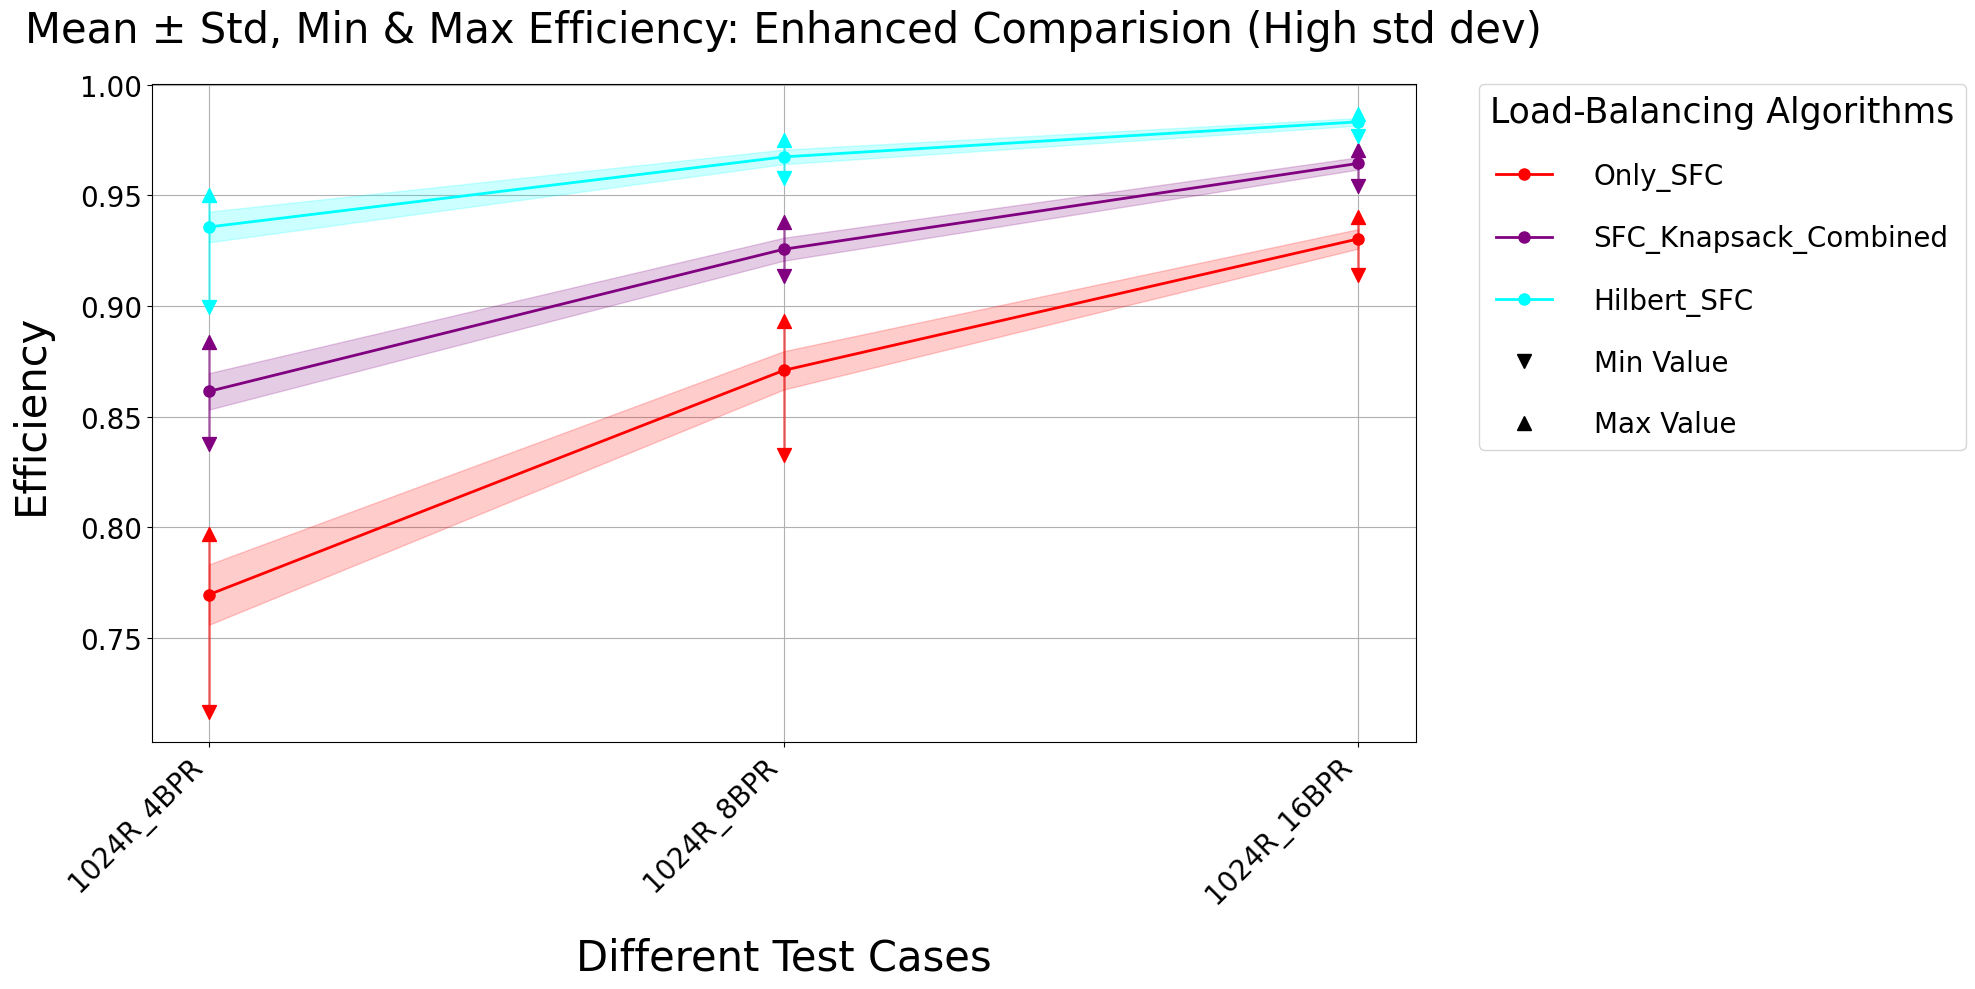

In [28]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
colors = ['red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (High std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_all_stats_2.png', dpi=600)
plt.show()



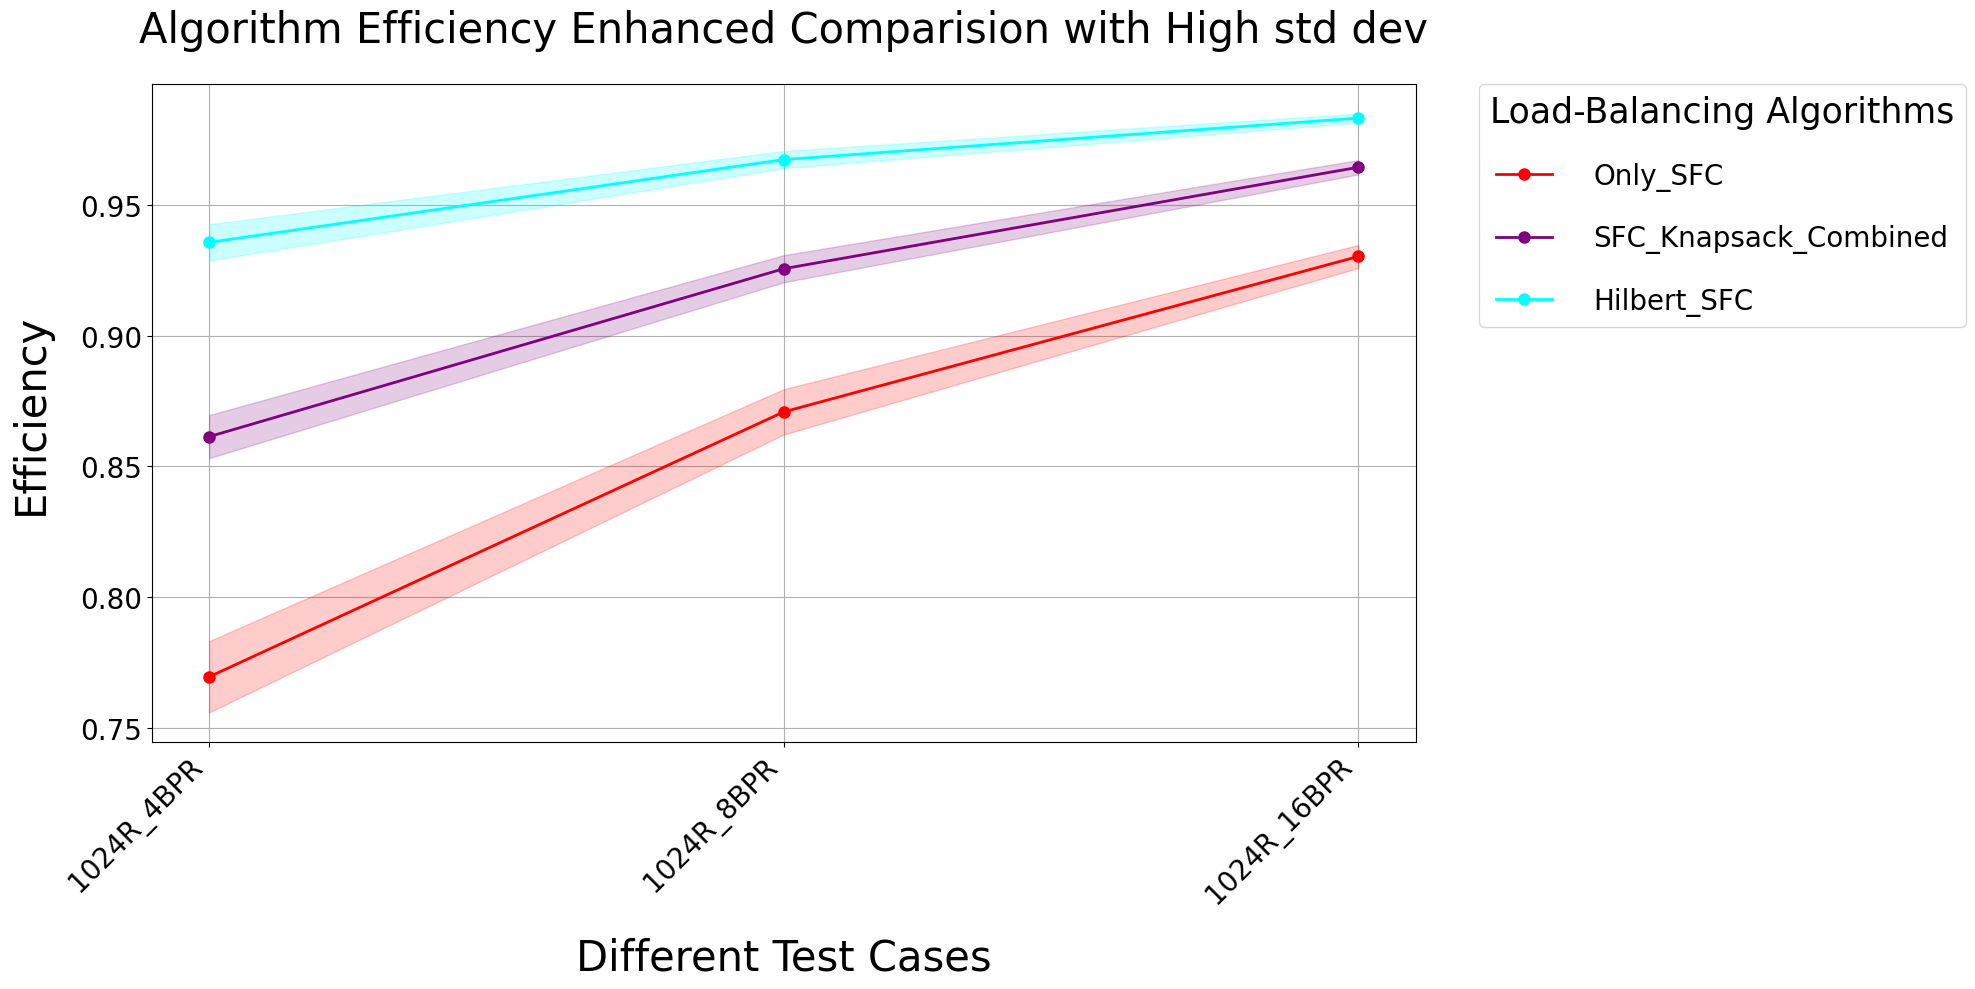

In [29]:
algorithms = ['Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
colors = ['red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with High std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_worst/efficiency_all_stats_2_nominmax.png', dpi=600)
plt.show()

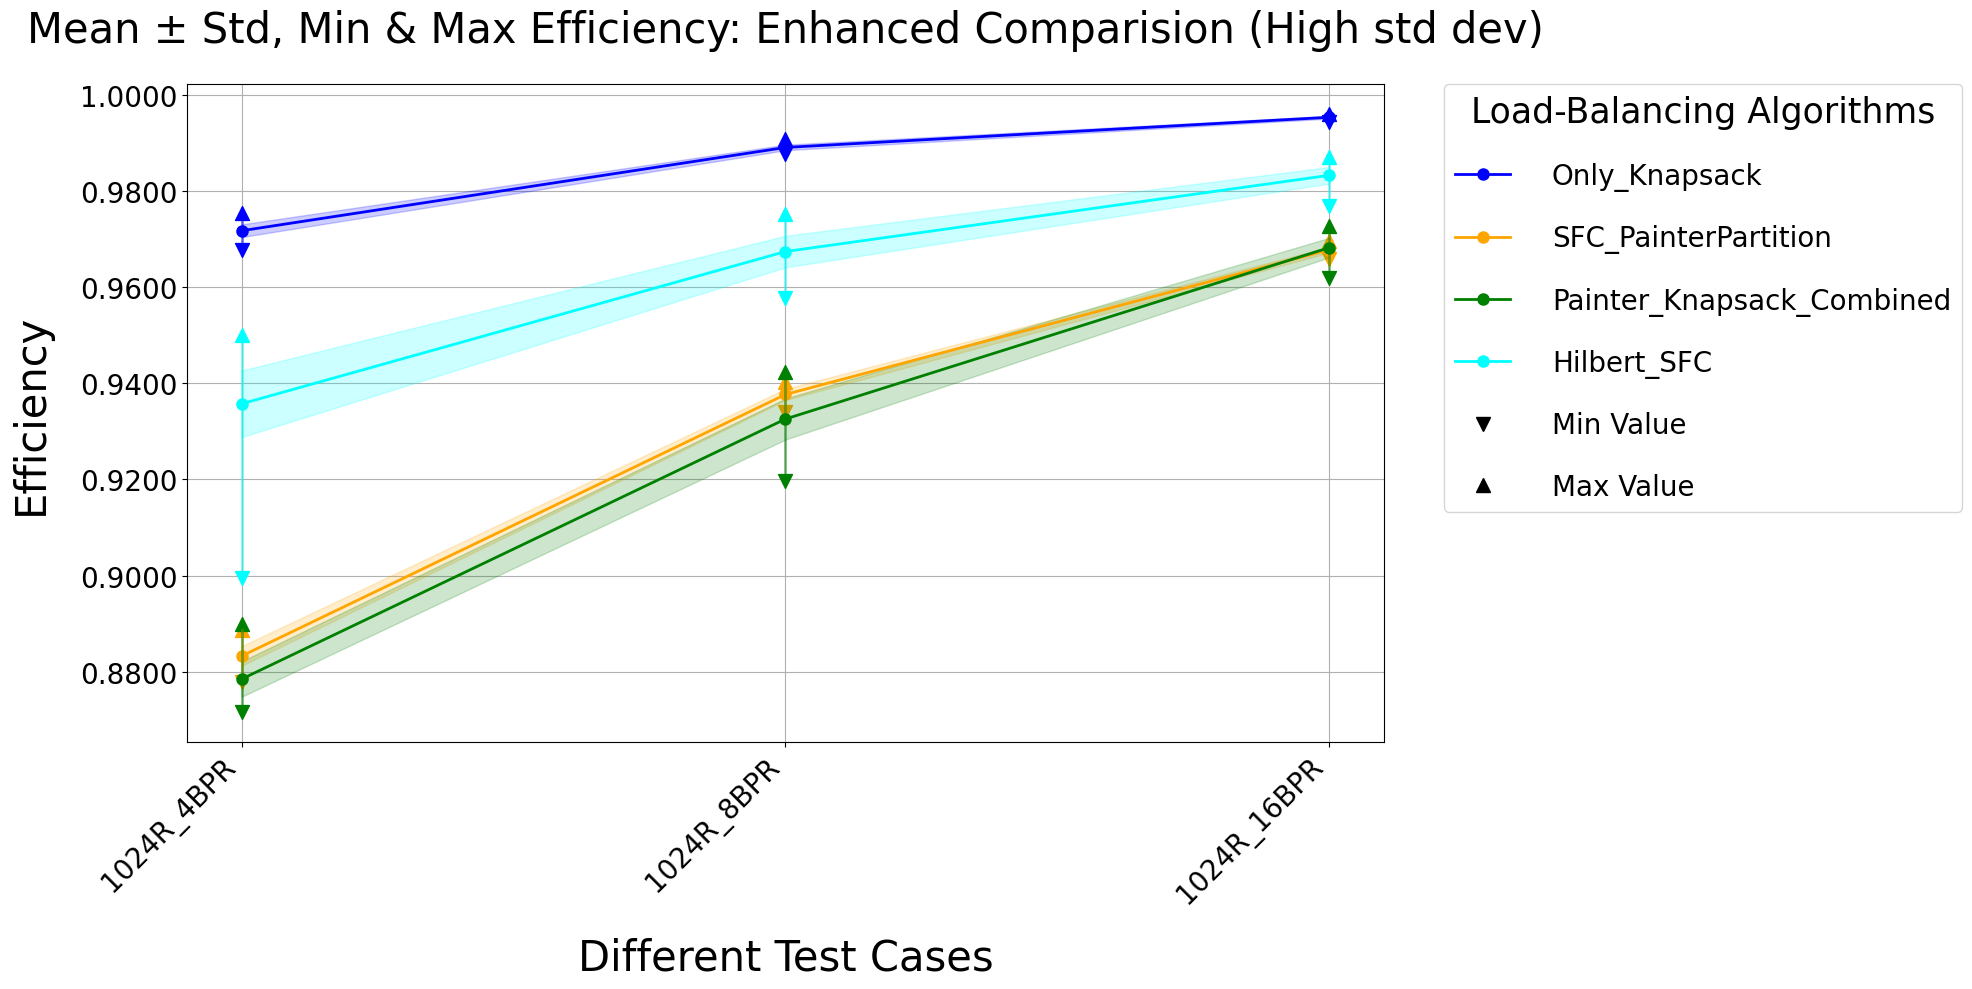

In [30]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']


algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined', 'Hilbert_SFC']
colors = ['blue','orange', 'green', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (High std dev)', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_all_stats_3.png', dpi=600)
plt.show()


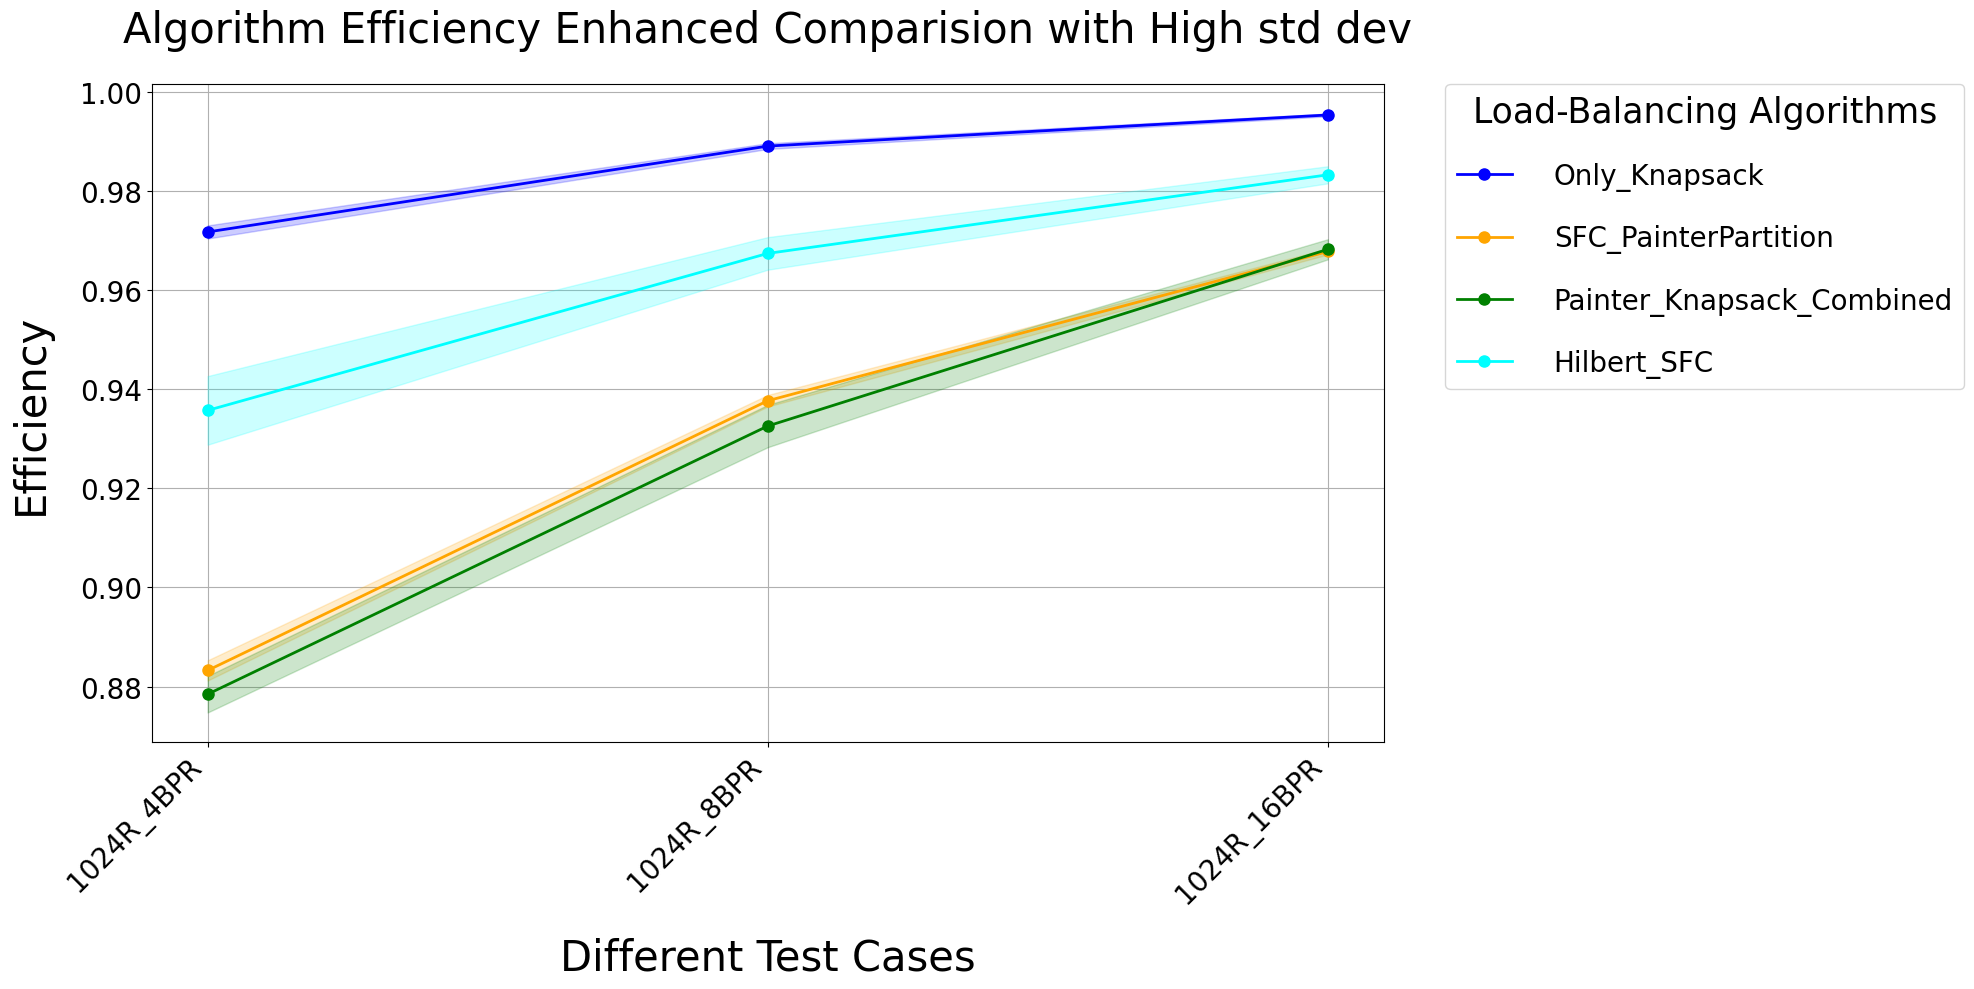

In [32]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined', 'Hilbert_SFC']
colors = ['blue','orange', 'green', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with High std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_worst/efficiency_all_stats_3_nominmax.png', dpi=600)
plt.show()

In [33]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024R_4BPR,0.971723,0.001321,0.967635,0.975398,0.883263,0.002035,0.877885,0.888738,0.878467,0.003687,0.871528,0.889836,0.769548,0.013640,0.716235,0.797021,0.861408,0.008242,0.837811,0.883597,0.935723,0.006921,0.899499,0.949990,0.682703,0.979532,0.264913,5.676039,0.029217,0.025460,0.004249,0.061391,0.201337,0.271239,0.071172,1.433558,0.351766,0.523436,0.132742,2.777488,0.183785,0.285965,0.066077,1.642102,0.090979,0.147865,0.033991,0.805930
1,1024R_8BPR,0.989047,0.000580,0.987584,0.990815,0.937671,0.001161,0.934101,0.940345,0.932569,0.004270,0.919653,0.942356,0.870895,0.008672,0.832767,0.893334,0.925652,0.005185,0.913476,0.937970,0.967395,0.003287,0.957785,0.975219,0.271931,0.027345,0.248055,0.482967,0.186058,0.040151,0.014548,0.207765,0.225481,0.053982,0.078875,0.327600,0.135923,0.018611,0.123337,0.318434,0.073207,0.017339,0.063994,0.228223,0.036373,0.004180,0.033342,0.085437
2,1024R_16BPR,0.995328,0.000273,0.994303,0.996084,0.967784,0.000596,0.965929,0.969658,0.968225,0.002032,0.961853,0.972713,0.930347,0.004407,0.914176,0.940447,0.964471,0.002752,0.954454,0.970348,0.983255,0.001723,0.976787,0.986961,0.265820,0.008770,0.250842,0.313190,0.693189,0.005445,0.686263,0.708841,0.729714,0.088636,0.112231,0.863797,0.134139,0.005417,0.124020,0.166864,0.072758,0.002941,0.066973,0.091004,0.038717,0.004176,0.035296,0.101004


In [35]:

# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     std_col = f'{alg_name}_Final_Time_std'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]
#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
#     upper_bound = grouped[mean_col] + grouped[std_col]

#     ax.fill_between(
#         x,
#         lower_bound,
#         upper_bound,
#         color=alg_color,
#         alpha=0.2
#     )
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]
#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
# ax.set_title('Mean ± Std, Min & Max Time for each Algorithm (High std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_yscale('log')
# ax.set_ylim(1e-6, 0)  

# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats.png', dpi=600)
# plt.show()




In [36]:
# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]

#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]

#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
# ax.set_title('Mean, Min & Max Time for each Algorithm (High std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_yscale('log')
# ax.set_ylim(1e-7, 0)  


# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats_2.png', dpi=600)
# plt.show()




In [34]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024R_4BPR,0.971723,0.001321,0.967635,0.975398,0.883263,0.002035,0.877885,0.888738,0.878467,0.003687,0.871528,0.889836,0.769548,0.013640,0.716235,0.797021,0.861408,0.008242,0.837811,0.883597,0.935723,0.006921,0.899499,0.949990,0.682703,0.979532,0.264913,5.676039,0.029217,0.025460,0.004249,0.061391,0.201337,0.271239,0.071172,1.433558,0.351766,0.523436,0.132742,2.777488,0.183785,0.285965,0.066077,1.642102,0.090979,0.147865,0.033991,0.805930
1,1024R_8BPR,0.989047,0.000580,0.987584,0.990815,0.937671,0.001161,0.934101,0.940345,0.932569,0.004270,0.919653,0.942356,0.870895,0.008672,0.832767,0.893334,0.925652,0.005185,0.913476,0.937970,0.967395,0.003287,0.957785,0.975219,0.271931,0.027345,0.248055,0.482967,0.186058,0.040151,0.014548,0.207765,0.225481,0.053982,0.078875,0.327600,0.135923,0.018611,0.123337,0.318434,0.073207,0.017339,0.063994,0.228223,0.036373,0.004180,0.033342,0.085437
2,1024R_16BPR,0.995328,0.000273,0.994303,0.996084,0.967784,0.000596,0.965929,0.969658,0.968225,0.002032,0.961853,0.972713,0.930347,0.004407,0.914176,0.940447,0.964471,0.002752,0.954454,0.970348,0.983255,0.001723,0.976787,0.986961,0.265820,0.008770,0.250842,0.313190,0.693189,0.005445,0.686263,0.708841,0.729714,0.088636,0.112231,0.863797,0.134139,0.005417,0.124020,0.166864,0.072758,0.002941,0.066973,0.091004,0.038717,0.004176,0.035296,0.101004


In [35]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'Painter_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'Painter_Knapsack_Combined_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'Hilbert_SFC_Efficiency_mean', 'Hilbert_SFC_Final_Time_mean']
new_df = grouped[columns_to_keep]


In [36]:
new_df

,File,Only_Knapsack_Efficiency_mean,Only_SFC_Efficiency_mean,SFC_PainterPartition_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_mean,Only_Knapsack_Final_Time_mean,Only_SFC_Final_Time_mean,SFC_PainterPartition_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_mean,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Final_Time_mean
0,1024R_4BPR,0.971723,0.769548,0.883263,0.878467,0.861408,0.682703,0.351766,0.029217,0.201337,0.183785,0.935723,0.090979
1,1024R_8BPR,0.989047,0.870895,0.937671,0.932569,0.925652,0.271931,0.135923,0.186058,0.225481,0.073207,0.967395,0.036373
2,1024R_16BPR,0.995328,0.930347,0.967784,0.968225,0.964471,0.265820,0.134139,0.693189,0.729714,0.072758,0.983255,0.038717


In [40]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

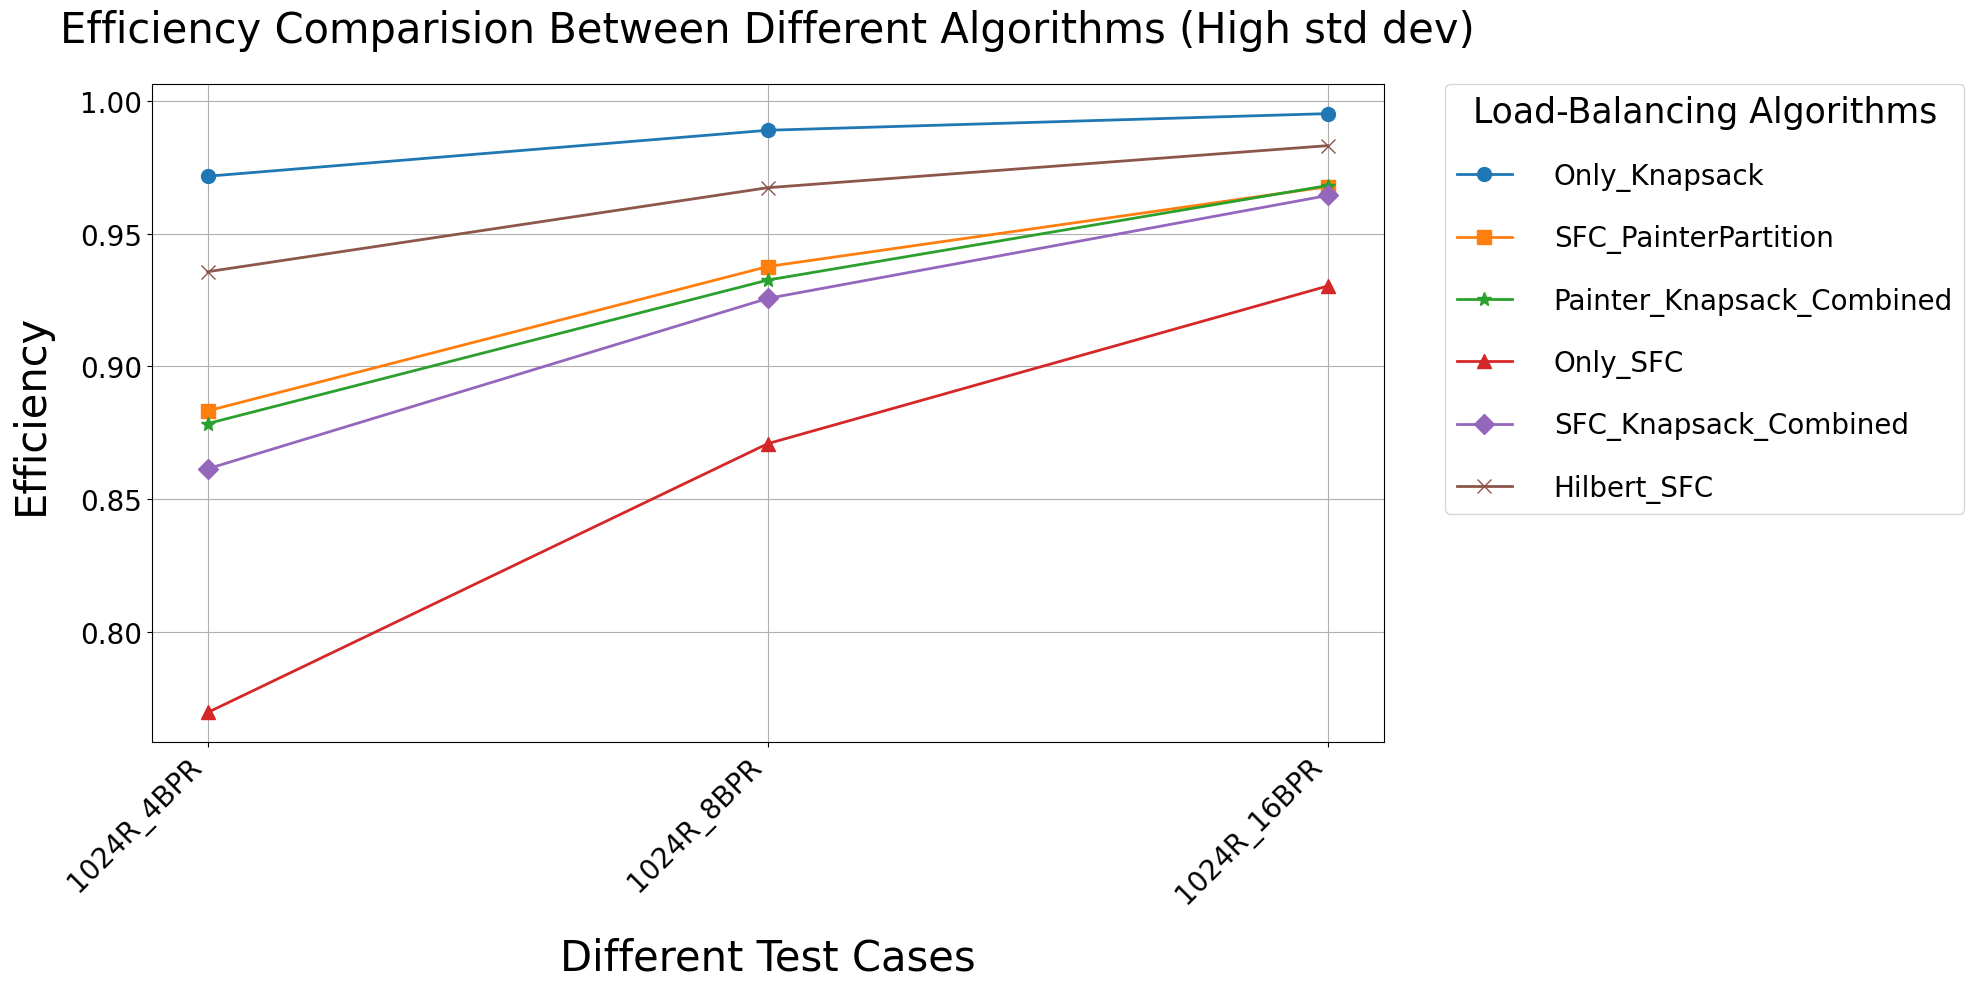

In [38]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Painter_Knapsack_Combined', 'Painter_Knapsack_Combined_Efficiency_mean', 'Painter_Knapsack_Combined_Final_Time_mean', '*'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D'),
    ('Hilbert_SFC', 'Hilbert_SFC_Efficiency_mean', 'Hilbert_SFC_Final_Time_mean', 'x')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms (High std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)

ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency.png', dpi=600)
plt.show()





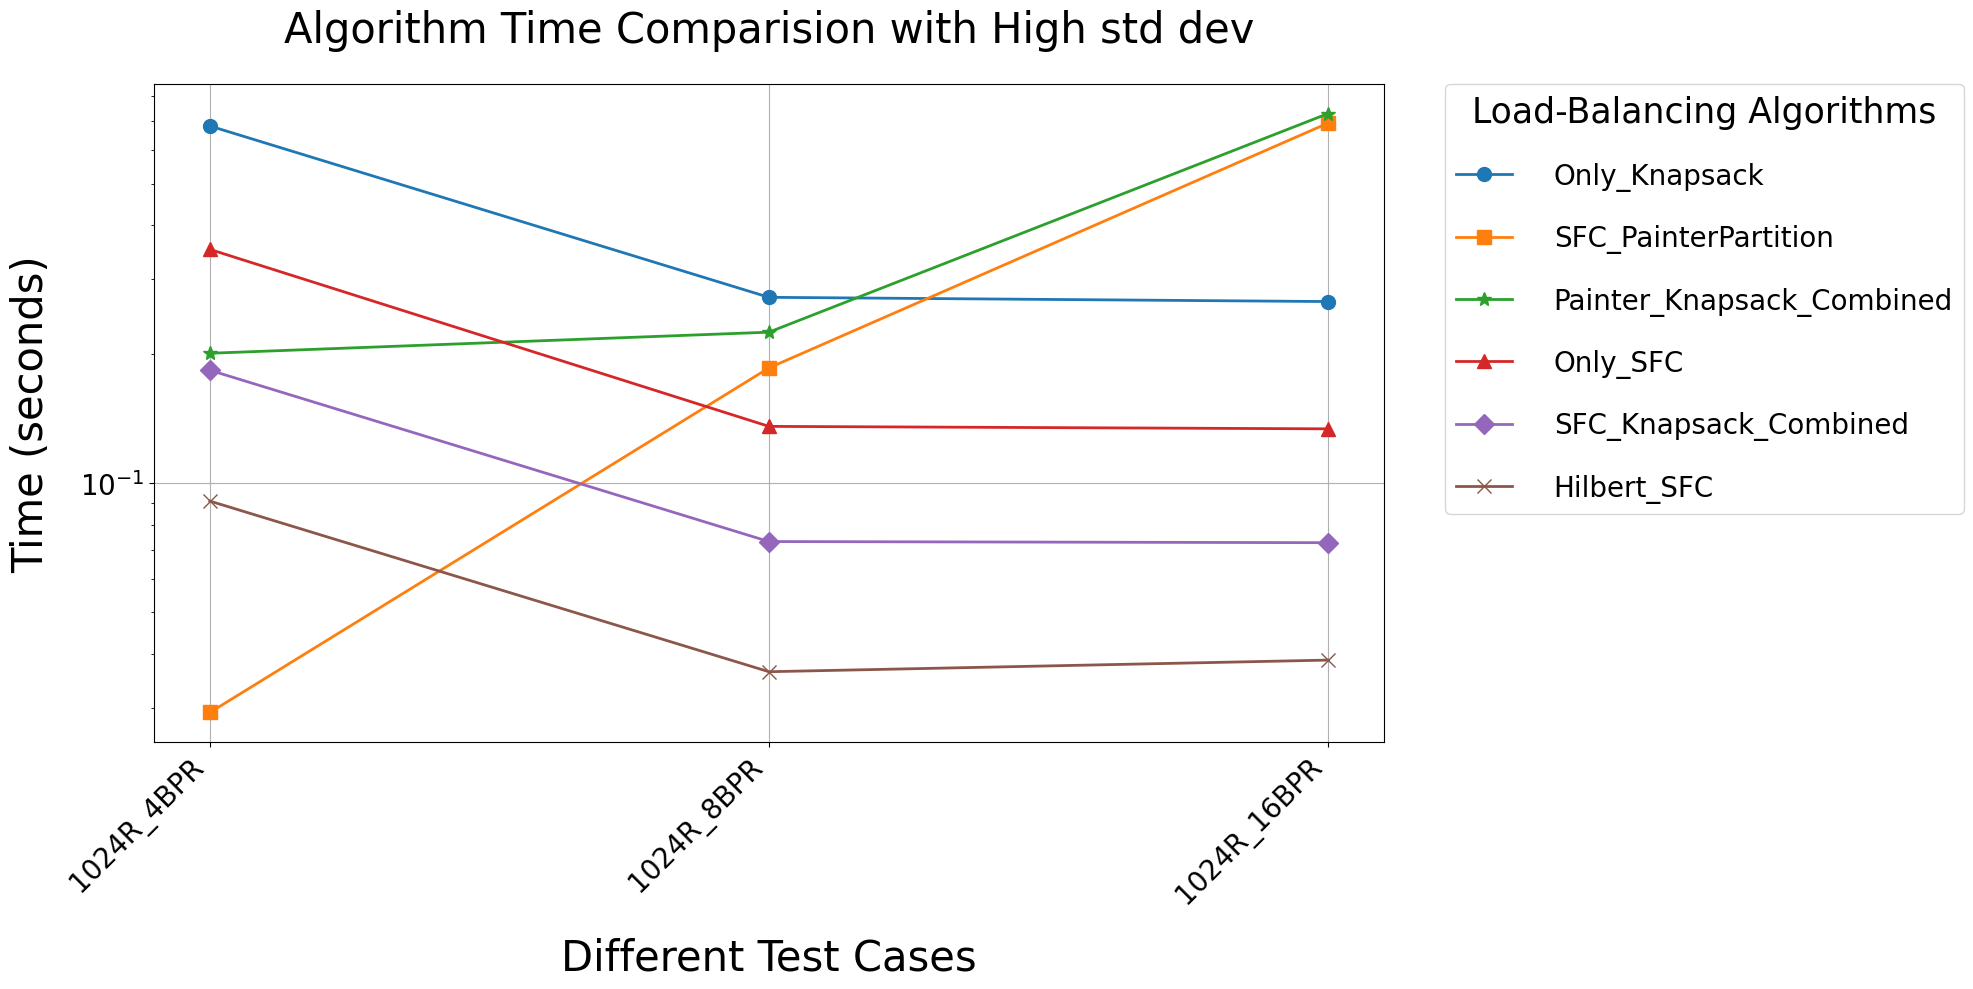

In [39]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Algorithm Time Comparision with High std dev', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)

ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('../result/result_worst/time.png', dpi=600)
plt.show()


